In [1]:
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

In [2]:
Nbig = int(2**16)
err = 1e-5

beta = 500.
mu = 0.1
J = 1.

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
nu = (2 * np.arange(Nbig) - Nbig ) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

$$G(i\omega_n) = \frac{1}{i\omega_n + \mu -\Sigma(\omega_n)}$$
$$ \Sigma(\tau) = -J^2 G^2(\tau)G(-\tau)$$

In [3]:
Gtau = -0.5*np.ones(Nbig) 
#Gtau = Freq2TimeF(1/(1j*omega + mu),Nbig,beta)
''' It's crucial to start with this, even changing the sign here is enough to make the solution 
fall into an unwanted one'''

itern = 0
diff = 1.
x = 0.2

while(diff>err):
    itern+=1
    diffold = diff
    
    oldGtau = 1.0*Gtau
    oldGomega = Time2FreqF(oldGtau,Nbig,beta)
    
    Sigmatau = J**2 * Gtau**2 * Gtau[::-1] #KMS G(-tau) = -G(beta-tau)
    #Sigmatau = J**2 * Gtau**3
    Sigmaomega = Time2FreqF(Sigmatau,Nbig,beta)
    # if itern<10: 
    #     Sigmaomega[Nbig//2-1] = mu
    #     Sigmaomega[Nbig//2] = mu
    
    Gomega = x*(1./(1j*omega + mu - Sigmaomega)) + (1-x)*oldGomega
    #Gtau = Freq2TimeF(Gomega - (1/(1j*omega)),Nbig,beta) - 0.5 #cool trick for Gibbs oscillations
    Gtau = Freq2TimeF(Gomega,Nbig,beta)
    
    #diff = (1.0/Nbig) * np. sqrt(np.sum((np.abs(Gtau-oldGtau))**2))
    diff = np. sqrt((1.0/Nbig) * np.sum((np.abs(Gtau-oldGtau))**2)) #changed
    # if diff>diffold:
    #     x/=2


Q = 0.5*(Gtau[0] - Gtau[-1])
print("itern = ",itern," , diff = ", diff, " , x = ", x)
print("Q = ", np.real(Q))

itern =  26  , diff =  8.26309215875587e-06  , x =  0.2
Q =  0.10620141557171511


Text(0.5, 1.0, 'Q = 0.106 ')

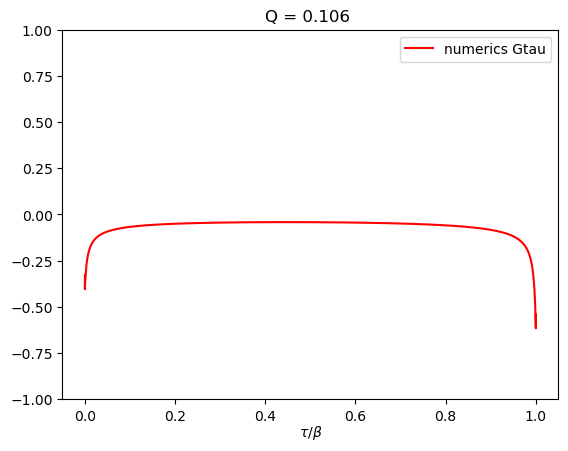

In [4]:
plt.plot(tau/beta, np.real(Gtau), 'r', label = 'numerics Gtau')
#plt.plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
plt.ylim(-1,1)
plt.xlabel(r'$\tau/\beta$',labelpad = 0)
plt.legend()
plt.title('Q = %.3f ' %np.real(Q) )

Text(0.5, 1.0, '$\\mu = $ 0.1 ;  Q = 0.106')

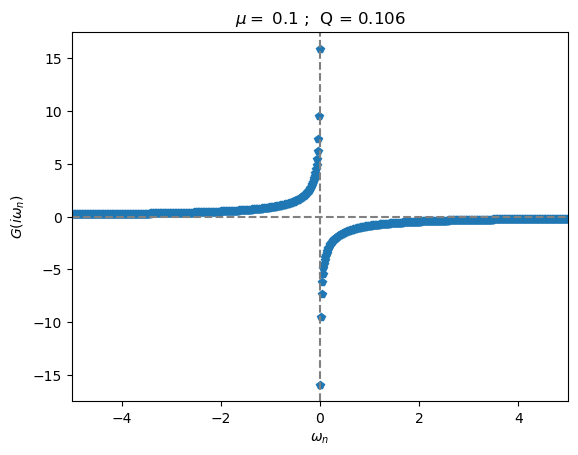

In [18]:
plt.plot(omega,np.imag(Gomega),'p')
plt.plot(omega,np.zeros_like(omega), color = 'gray', linestyle = '--')
plt.axvline(0,color='gray',linestyle = '--')
plt.xlim(-5,5)
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$G(i\omega_n)$')
plt.title(r'$\mu = $ ' + str(mu) + ' ;  Q = %.3f' %np.real(Q))

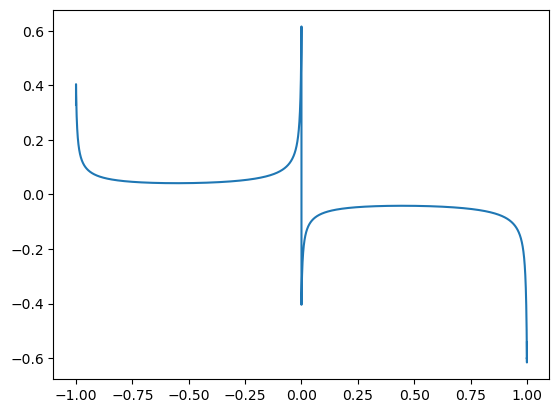

In [6]:
doubledtau = np.array([-1*tau[::-1]] + [tau]).flatten()
doubledG = np.real(np.array([-1*Gtau] + [Gtau]).flatten())
plt.plot(doubledtau/beta,doubledG)

<Figure size 600x600 with 0 Axes>

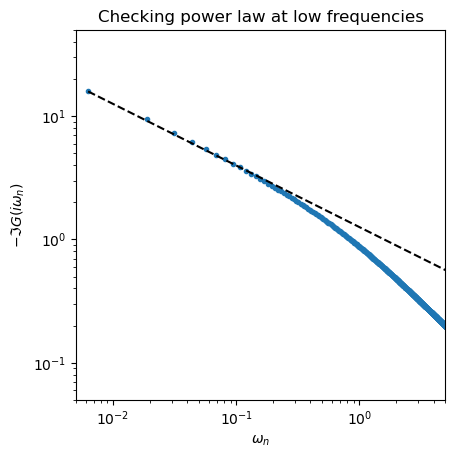

<Figure size 600x600 with 0 Axes>

In [7]:
plt.loglog(omega[Nbig//2:],-np.imag(Gomega[Nbig//2:]),'.')
fudfac = -np.imag(Gomega[Nbig//2])/omega[Nbig//2]**(-0.5)
plt.loglog(omega[Nbig//2:],fudfac* (omega[Nbig//2:]**(-0.5)),'k--')
plt.title('Checking power law at low frequencies')
plt.xlabel(r'$\omega_n$')
plt.ylabel(r'$-\Im{G(i\omega_n)}$')
plt.xlim(5e-3,5e0)
plt.ylim(5e-2,5e1)
plt.gca().set_aspect('equal')
plt.figure(figsize=(6,6))

In [8]:
A = np.array([1,2,3,4,5])
np.array([-1*A[::-1]]+ [A]).flatten()

array([-5, -4, -3, -2, -1,  1,  2,  3,  4,  5])

In [9]:
tau[::-1][0], beta

(499.9961853027344, 500.0)

In [10]:
val = 10
-tau[::-1][val],beta - tau[val]
np.real(Gtau[::-1][val]), np.real(Gtau[val])

(-0.589597780696213, -0.38457850540742294)

### Let's check if we've actually found a solution
Looks like we did 

In [15]:
print((1/Nbig) * np.sum(np.abs(Gomega - 1./(1j*omega + mu - Sigmaomega))**2))
print(np.allclose(Sigmatau , (J**2 * Gtau**2 * Gtau[::-1])))

4.1674006362350716e-09
False


In [12]:
np.allclose(2.0,2.0001)

False

In [13]:
omega[Nbig//2]

0.006283185307179587

Text(0.5, 1.0, '$\\mu = $ 0.1 ;  $Re{\\Sigma(\\omega \\rightarrow 0^+)}$  =  0.08967727711595687')

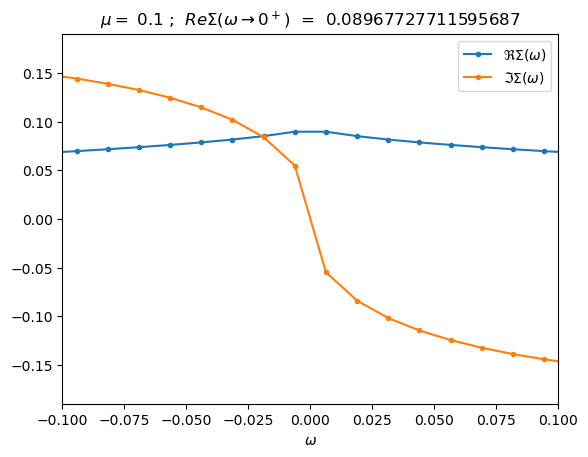

In [14]:
plt.plot(omega,np.real(Sigmaomega),'.-',label=r'$\Re{\Sigma(\omega)}$')
plt.plot(omega,np.imag(Sigmaomega),'.-',label=r'$\Im{\Sigma(\omega)}$')
plt.xlim(-0.1,0.1)
plt.xlabel(r'$\omega$')
plt.legend()
plt.title(r'$\mu = $ ' + str(mu) + r' ;  $Re{\Sigma(\omega \rightarrow 0^+)}$  =  ' + str(np.real(Sigmaomega[Nbig//2])))

(-0.2, 0.2)

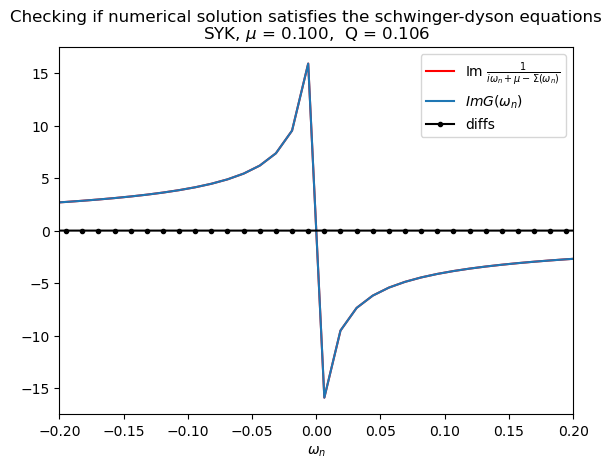

In [32]:
fig, ax1 = plt.subplots(1)
fig.tight_layout(pad=3)
fig.suptitle('Checking if numerical solution satisfies the schwinger-dyson equations')

ax1.plot(omega,np.imag(1./(1j*omega + mu  - Sigmaomega)),'r',label=r'Im $\frac{1}{i\omega_n + \mu - \Sigma(\omega_n)}$') 
ax1.plot(omega,np.imag(Gomega),label=r'$Im G(\omega_n)$')
ax1.plot(omega,np.imag(Gomega - 1./(1j*omega + mu  - Sigmaomega)),'k.-',label='diffs')
ax1.set_title('SYK, $\\mu$ = %.3f,  Q = %.3f' %(mu,np.real(Q)))
ax1.legend()
ax1.set_xlabel(r'$\omega_n$')
ax1.set_xlim(-0.2,0.2)
#ax1.set_ylim(-0.3,0.3)